<a href="https://colab.research.google.com/github/shasso2s/pytorch/blob/main/2021_WS_Projekt_zur_Datenanalyse_Muticlassification_BreastCancer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import cv2

import matplotlib.pylab as plt
import os
from PIL import Image

from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter


from sklearn.model_selection import train_test_split


from sklearn.utils.class_weight import compute_class_weight

import re

import random

import time
import copy

import pandas as pd

import numpy as np

import seaborn as sns
sns.set()

from os import listdir
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import pandas as pd

### Data Preprocessing:

In [ ]:
type_cancer=listdir('BreaKHis_v1/histology_slides/breast')
subtype_malignant=listdir('BreaKHis_v1/histology_slides/breast/1/SOB')
subtype_Begin=listdir('BreaKHis_v1/histology_slides/breast/0/SOB')
print('type von brust cancer {} :'.format(type_cancer))
print('subtype von Malignant{} :'.format(subtype_malignant))
print('subtype von benign{} :'.format(subtype_Begin))


type von brust cancer ['0', '1', 'count_files.sh', 'README.txt'] :
subtype von Malignant['ductal_carcinoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma'] :
subtype von benign['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma'] :


* the somme of pictures :  **7909** 
* somme  of begnin pictures**2480** Bilder
* the somme of malignat pictures **5429** Bilder


In [ ]:
path_summe=glob(r'BreaKHis_v1/histology_slides/breast/*/SOB/*/*/*.png',recursive=True)
path_malignant=glob(r'BreaKHis_v1/histology_slides/breast/1/SOB/*/*/*.png',recursive=True)
path_begnin=glob(r'BreaKHis_v1/histology_slides/breast/0/SOB/*/*/*.png',recursive=True)

def malignat_anzahl(path_malignant):
    i=0
    for fileimage in path_malignant[:]:
        i=i+1
    return i



def begnin_anzhal(path_begnin):
    i=0
    for filename in path_begnin[:]:
        i=i+1
    return i

anzhal_malignant=malignat_anzahl(path_malignant)
anzahl_begnin=begnin_anzhal(path_begnin)


print('somme of pictures in general: {}'.format(len(path_summe)))
print('the somme of malignat  pictures {}'.format(anzhal_malignant))
print('the summe of benign pictures : {}'.format(anzahl_begnin))

somme of pictures in general: 7909
the somme of malignat  pictures 5429
the summe of benign pictures : 2480


## Data Visualization: 


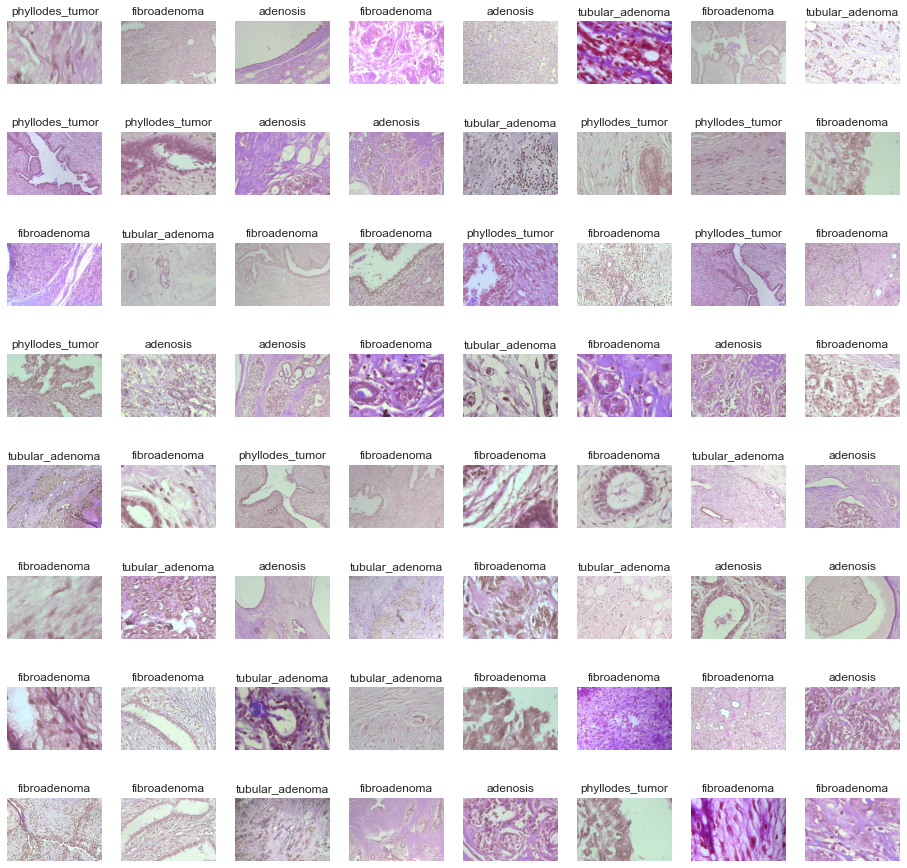

In [ ]:
import re
def plot_begnin_subtypen(path):
    
    plt.rcParams['figure.figsize']=(16.0,16.0)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    random.shuffle(path)
    i=0
    title=""
    for image in path[0:64]:
     
        if 'adenosis' in image:
            title='adenosis'
        elif 'fibroadenoma' in image:
            title='fibroadenoma'
        elif 'phyllodes_tumor' in image:
            title='phyllodes_tumor'
        else:
            title='tubular_adenoma'
        
        im=cv2.imread(image)
        plt.subplot(8,8,i+1).set_title(title)
        plt.imshow(im)
        plt.axis('off')
        i=i+1

        
plot_begnin_subtypen(path_begnin)

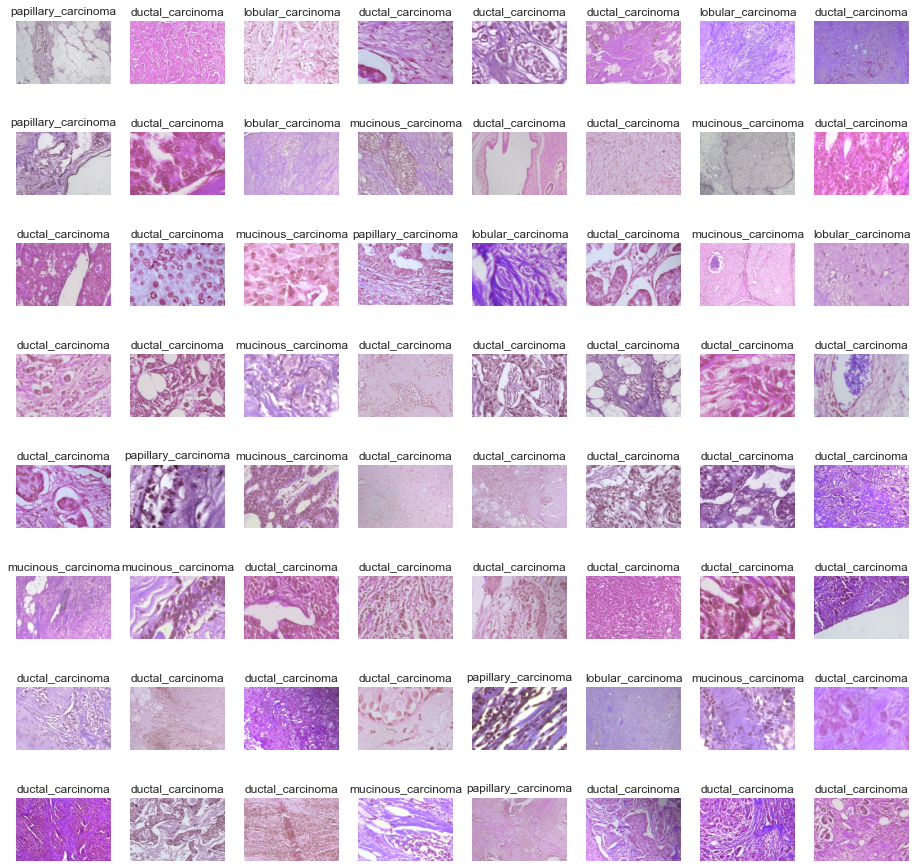

In [ ]:
def plot_malignant_subtypen(path):
    
    plt.rcParams['figure.figsize']=(16.0,16.0)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    i=0
    title=""
    random.shuffle(path)
    
    for image in path[0:64]:
        if 'ductal_carcinoma' in image:
            title='ductal_carcinoma'
        elif 'lobular_carcinoma' in image:
            title='lobular_carcinoma'
        elif 'mucinous_carcinoma' in image:
            title='mucinous_carcinoma'
        else:
            title='papillary_carcinoma'
        
        im=cv2.imread(image)
        plt.subplot(8,8,i+1).set_title(title)
        plt.imshow(im)
        plt.axis('off')
        i=i+1
        
    
plot_malignant_subtypen(path_malignant)   

In [ ]:
# Create DtaFrame
#path_beg(path_begnin)#2480
#path(path_malignant)#5429
#subfiles = listdir(r'BreaKHis_v1/histology_slides/breast')
#subfiles

## Dataframe :
* die Dataframe is defined through: 
    * ID : Identification_number.
    * **Label**: is 0 or 1
    
    * **Subclass:**
        **Begnin** :['adenosis','phyllodes_tumor','fibroadenoma','tubular_adenoma'] 
        **malignant** ['ductal_carcinoma','lobular_carcinoma','mucinous_carcinoma','papillary_carcinoma']
    * **groesse**:[x40,x100,x200,x400]
    * **path**: path für das Bild
        
    

In [ ]:

path_0=glob(r'BreaKHis_v1/histology_slides/breast/0/SOB/*/*/*.png',recursive=True)
path_1=glob(r'BreaKHis_v1/histology_slides/breast/1/SOB/*/*/*.png',recursive=True)
path_0_1 = path_0 + path_1
#len(path_0_1)

### i have created the Dataframe to help help me by splitting my dataset into training , validation and testing

In [ ]:
data=pd.DataFrame(index=np.arange(0,len(path_0_1)),columns=['ID','label','Subclass','groesse','path'])

(path_0_1[0].split('/')[4]).split('\\')

ID=[]
for i in range(len(path_0_1)):
    
    ID.append(((path_0_1[i].split('/')[4]).split('\\'))[3].split('.')[0])
    
def fillDataframe(data,path_0_1):
    
    label=path_0_1
    for i in range(len(path_0_1)):
        data.iloc[i]['ID'] = ID[i]
        if r"BreaKHis_v1/histology_slides/breast/0/SOB" in label[i]:
            data.iloc[i]['label']=str(0)   
       # subfiles=listdir(path_base)
        if r"BreaKHis_v1/histology_slides/breast/1/SOB" in label[i]:
             data.iloc[i]['label']=str(1)
    
        if 'adenosis' in label[i] :
                data.iloc[i]["Subclass"] = 'adenosis'
                data.iloc[i]['path']=label[i]
        if 'phyllodes_tumor' in label[i]:
                data.iloc[i]["Subclass"] = 'phyllodes_tumor'  
                data.iloc[i]['path']=label[i]
        if 'fibroadenoma' in label[i]:
                data.iloc[i]["Subclass"] = 'fibroadenoma'
                data.iloc[i]['path']=label[i]
        if 'tubular_adenoma' in label[i]:
                data.iloc[i]["Subclass"] = 'tubular_adenoma'
                data.iloc[i]['path']=label[i]
                
        
        if 'ductal_carcinoma' in label[i] :
                data.iloc[i]["Subclass"] = 'ductal_carcinoma'
                data.iloc[i]['path']=label[i]
        if 'lobular_carcinoma' in label[i]:
                data.iloc[i]["Subclass"] = 'lobular_carcinoma'  
                data.iloc[i]['path']=label[i]
        if 'mucinous_carcinoma' in label[i]:
                data.iloc[i]["Subclass"] = 'mucinous_carcinoma'
                data.iloc[i]['path']=label[i]
        if 'papillary_carcinoma' in label[i]:
                data.iloc[i]["Subclass"] = 'papillary_carcinoma'
                data.iloc[i]['path']=label[i]
 
       
        if "x100\SOB" in label[i]:
                data.iloc[i]["groesse"] = 'x100'
        if "x200\SOB" in label[i]:
                data.iloc[i]["groesse"] = 'x200'
        if "x40\SOB" in label[i]:
                data.iloc[i]["groesse"] = 'x40'
        if "x400\SOB" in label[i]:
                data.iloc[i]["groesse"] = 'x400'
    return data
   
data=fillDataframe(data,path_0_1)
df=data
df


,ID,label,Subclass,groesse,path
0,SOB_B_A-14-22549AB-100-001,0,adenosis,x100,BreaKHis_v1/histology_slides/breast/0/SOB\aden...
1,SOB_B_A-14-22549AB-100-002,0,adenosis,x100,BreaKHis_v1/histology_slides/breast/0/SOB\aden...
2,SOB_B_A-14-22549AB-100-003,0,adenosis,x100,BreaKHis_v1/histology_slides/breast/0/SOB\aden...
3,SOB_B_A-14-22549AB-100-004,0,adenosis,x100,BreaKHis_v1/histology_slides/breast/0/SOB\aden...
4,SOB_B_A-14-22549AB-100-005,0,adenosis,x100,BreaKHis_v1/histology_slides/breast/0/SOB\aden...
...,...,...,...,...,...
7904,SOB_M_PC-15-190EF-400-011,1,papillary_carcinoma,x400,BreaKHis_v1/histology_slides/breast/1/SOB\papi...
7905,SOB_M_PC-15-190EF-400-012,1,papillary_carcinoma,x400,BreaKHis_v1/histology_slides/breast/1/SOB\papi...
7906,SOB_M_PC-15-190EF-400-013,1,papillary_carcinoma,x400,BreaKHis_v1/histology_slides/breast/1/SOB\papi...
7907,SOB_M_PC-15-190EF-400-014,1,papillary_carcinoma,x400,BreaKHis_v1/histology_slides/breast/1/SOB\papi...


In [ ]:
### DataFrame eingenschaften:
print('DataFrame hat kein Null Werten: {}'.format(df.isna().sum()))
print('Label hat die werten :{}'.format(df.label.unique()))
print('subclass hat die String :{}'.format(df.Subclass.unique()))
print('DataFrame hat die Groesse :{}'.format(df.groesse.unique()))

DataFrame hat kein Null Werten: ID          0
label       0
Subclass    0
groesse     0
path        0
dtype: int64
Label hat die werten :['0' '1']
subclass hat die String :['adenosis' 'fibroadenoma' 'phyllodes_tumor' 'tubular_adenoma'
 'ductal_carcinoma' 'lobular_carcinoma' 'mucinous_carcinoma'
 'papillary_carcinoma']
DataFrame hat die Groesse :['x100' 'x200' 'x40' 'x400']


#### Load DataFrame as Json

In [ ]:
df.to_json("dfWithPatientPathLabel.json")
loaded_df = pd.read_json("dfWithPatientPathLabel.json")


### The problem of unbalanced classes:

* Class 1 is the majority class and contains about **5429** histopathological images while class 0 is **2480**, the diffrenz is estimated to be **2949** with This phenomenon is common in medical data where infected classes are usually smaller than their healthy counterparts. This imbalance between classes is problematic because during training, the healthy class is learned much better than the infected class, leading to biased optimization and biased inference.

* **Solution** Data augumentation ----->imagedatagenerator



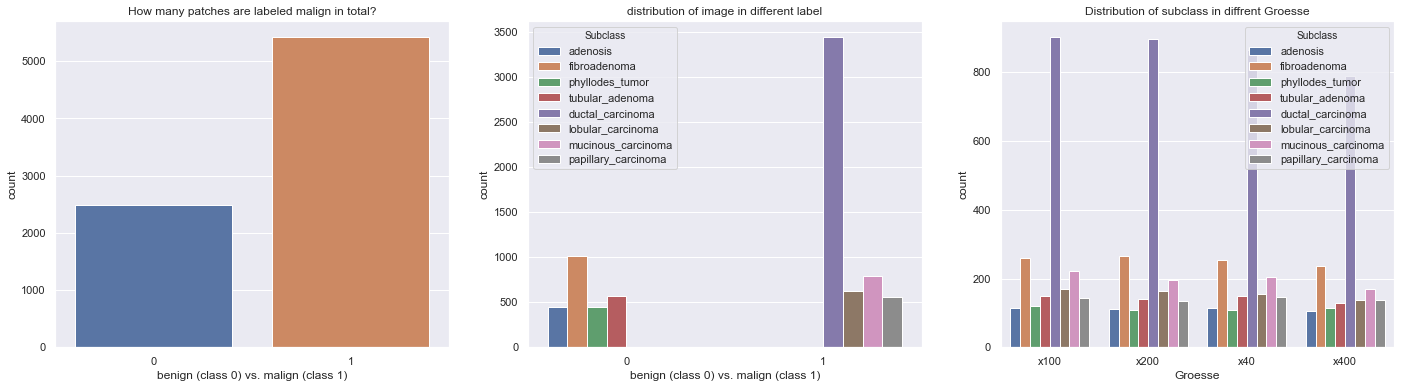

In [ ]:
def plotstatistics(loaded_df):
    fig,ax=plt.subplots(1,3,figsize=(24,6))
    sns.countplot(loaded_df.label,ax=ax[0]);
    ax[0].set_xlabel("benign (class 0) vs. malign (class 1)")
    ax[0].set_title("How many patches are labeled malign in total?")
    
    

    sns.countplot(data=loaded_df,x='label',hue='Subclass',ax=ax[1])
    ax[1].set_title("distribution of image in different label")
    ax[1].set_xlabel("benign (class 0) vs. malign (class 1)")
    
    sns.countplot(data=loaded_df,x='groesse',hue='Subclass',ax=ax[2])
    ax[2].set_title("Distribution of subclass in diffrent Groesse")
    ax[2].set_xlabel('Groesse')
    

    
    print();
plotstatistics(loaded_df)

In [ ]:
loaded_df.groupby('label').Subclass.value_counts(0)
loaded_df.groupby('Subclass').groesse.value_counts(0)

Subclass             groesse
adenosis             x40        114
                     x100       113
                     x200       111
                     x400       106
ductal_carcinoma     x100       903
                     x200       896
                     x40        864
                     x400       788
fibroadenoma         x200       264
                     x100       260
                     x40        253
                     x400       237
lobular_carcinoma    x100       170
                     x200       163
                     x40        156
                     x400       137
mucinous_carcinoma   x100       222
                     x40        205
                     x200       196
                     x400       169
papillary_carcinoma  x40        145
                     x100       142
                     x400       138
                     x200       135
phyllodes_tumor      x100       121
                     x400       115
                     x40        109

# Data Sliptting:
* Splitting der Data wird durch Identifikation_nummer
* Number of patients for training set: 5712
* Number of patients for validation set: 1089
* Number of patients for test set: 1108

In [ ]:
patient_id=loaded_df.ID.unique()

train_ids,test_ids=train_test_split(patient_id,test_size=0.14,random_state=42)

final_train_ids,val_ids=train_test_split(train_ids,test_size=0.16,random_state=42)

print("Number of patients for training set: " + str(len(final_train_ids)))
print("Number of patients for validation set: " + str(len(val_ids)))
print("Number of patients for test set: " + str(len(test_ids)))

Number of patients for training set: 5712
Number of patients for validation set: 1089
Number of patients for test set: 1108


* Speichern die gesplitet Data **train_df,test_df,val_df**

In [ ]:

#new training set:
train_df = loaded_df.loc[loaded_df.ID.isin(final_train_ids),:].copy()

#new test set:
test_df = loaded_df.loc[loaded_df.ID.isin(test_ids),:].copy()

#new validation set:
val_df = loaded_df.loc[loaded_df.ID.isin(val_ids),:].copy()


Here we see the class distribution for training, validation and test set respectively:


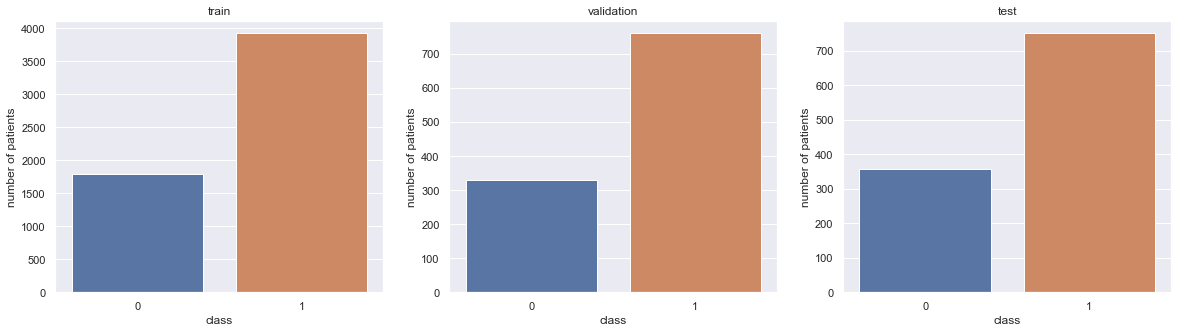

In [ ]:
# plot class distribution..
fig, ax = plt.subplots(1,3,figsize=(20,5))

# .. for training set
sns.countplot(train_df.label, ax=ax[0])
ax[0].set_title("train")
ax[0].set_xlabel("class")
ax[0].set_ylabel("number of patients")

# .. for validation set
sns.countplot(val_df.label, ax=ax[1])
ax[1].set_title("validation")
ax[1].set_xlabel("class")
ax[1].set_ylabel("number of patients")

# .. for test set
sns.countplot(test_df.label, ax=ax[2])
ax[2].set_title("test")
ax[2].set_xlabel("class")
ax[2].set_ylabel("number of patients")

print()
print("Here we see the class distribution for training, validation and test set respectively:")

#### after splitting 14% for testing, and from  training data i split 16% from validation dataset, and test rest is for training 
#### i should also use the data augemtation in training

## Data augmentation

* Im Folgenden werden wir die Trainingsdaten erweitern, um das Problem des Klassenungleichgewichts zu umgehen, das wir zuvor beschrieben haben. Wir werden die Anzahl der Bildfelder mit der Klasse 0 erhöhen, da diese viel kleiner ist als die Klasse 1.
* **Ziel**: ist es, die Daten der Klasse 0 (begnign), der Minderheitsklasse, zu vergrößern, bis sie die Größe der Mehrheitsklasse 1 erreichen.



####  after rum the data augemtation I made it as comment beacause it should not compliled twice

In [ ]:


'''datagen=ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

def image_generator(image_directory,datagen,SIZE,name_neu_folder,subtype):

    dataset=[]
    #image_directory='0/'
    #SIZE=128
    my_images=os.listdir(image_directory)
    for i , image_name in enumerate(my_images):
        if(image_name.split('.')[1]=='png'):
            image=cv2.imread(image_directory+image_name)
            image=Image.fromarray(image,'RGB')
            image=image.resize((SIZE,SIZE))
            dataset.append(np.array(image))
    x=np.array(dataset)
    i=0

    for batch in datagen.flow(x,
                          batch_size=2,
                          save_to_dir=name_neu_folder,
                          save_prefix=subtype,
                          save_format='png'):
                          
                                        
        i+=1
        
        if i>=94:    
            break
image_generator(image_directory,datagen,SIZE,name_neu_folder,subtype)'''

"datagen=ImageDataGenerator(\n    rotation_range=45,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode='reflect'\n)\n\ndef image_generator(image_directory,datagen,SIZE,name_neu_folder,subtype):\n\n    dataset=[]\n    #image_directory='0/'\n    #SIZE=128\n    my_images=os.listdir(image_directory)\n    for i , image_name in enumerate(my_images):\n        if(image_name.split('.')[1]=='png'):\n            image=cv2.imread(image_directory+image_name)\n            image=Image.fromarray(image,'RGB')\n            image=image.resize((SIZE,SIZE))\n            dataset.append(np.array(image))\n    x=np.array(dataset)\n    i=0\n\n    for batch in datagen.flow(x,\n                          batch_size=2,\n                          save_to_dir=name_neu_folder,\n                          save_prefix=subtype,\n                          save_format='png'):\n                          \n                             

In [ ]:
'''
path_source_ad=['0/SOB/adenosis/x40/','0/SOB/adenosis/x100/','0/SOB/adenosis/x200/','0/SOB/adenosis/x400/']
path_destination_ad=['0_augmented/Adenosis_augmented/x40_augmented','0_augmented/Adenosis_augmented/x100_augmented','0_augmented/Adenosis_augmented/x200_augmented','0_augmented/Adenosis_augmented/x400_augmented']

path_source_fb=['0/SOB/fibroadenoma/x40/','0/SOB/fibroadenoma/x100/','0/SOB/fibroadenoma/x200/','0/SOB/fibroadenoma/x400/']
path_destination_fb=['0_augmented/fibroadenoma_augmented/x40_augmented','0_augmented/fibroadenoma_augmented/x100_augmented','0_augmented/fibroadenoma_augmented/x200_augmented','0_augmented/fibroadenoma_augmented/x400_augmented']


path_source_pt=['0/SOB/phyllodes_tumor/x40/','0/SOB/phyllodes_tumor/x100/','0/SOB/phyllodes_tumor/x200/','0/SOB/phyllodes_tumor/x400/']
path_destination_pt=['0_augmented/phyllodes_tumor_augmented/x40_augmented','0_augmented/phyllodes_tumor_augmented/x100_augmented','0_augmented/phyllodes_tumor_augmented/x200_augmented','0_augmented/phyllodes_tumor_augmented/x400_augmented']

path_source_ta=['0/SOB/tubular_adenoma/x40/','0/SOB/tubular_adenoma/x100/','0/SOB/tubular_adenoma/x200/','0/SOB/tubular_adenoma/x400/']
path_destination_ta=['0_augmented/tubular_adenoma_augmented/x40_augmented','0_augmented/tubular_adenoma_augmented/x100_augmented','0_augmented/tubular_adenoma_augmented/x200_augmented','0_augmented/tubular_adenoma_augmented/x400_augmented']

for i in range(len(path_source_ad)):
    image_generator(path_source_ad[i],datagen,128,path_destination_ad[i],'adenosis')
    image_generator(path_source_fb[i],datagen,128,path_destination_fb[i],'fibroadenoma')
    image_generator(path_source_pt[i],datagen,128,path_destination_pt[i],'phyllodes_tumor')
    image_generator(path_source_ta[i],datagen,128,path_destination_ta[i],'tubular_adenoma')'''

114
253
109
149
113
260
121
150
111
264
108
140
106
237
115
130


In [ ]:
x=glob('0_augmented/*/*/*.png')
x[2000]

'0_augmented\\phyllodes_tumor_augmented\\x400_augmented\\phyllodes_tumor_64_6492.png'

In [ ]:

ID_augmented=[]
for i in range(len(x)):
    
    ID_augmented.append(x[i].split('\\')[3].split('.')[0])
ID_augmented

['adenosis_0_6990',
 'adenosis_0_8075',
 'adenosis_100_2681',
 'adenosis_100_4306',
 'adenosis_101_4485',
 'adenosis_101_8626',
 'adenosis_102_6839',
 'adenosis_102_9867',
 'adenosis_103_2027',
 'adenosis_103_6682',
 'adenosis_104_5214',
 'adenosis_105_1342',
 'adenosis_106_5121',
 'adenosis_106_8922',
 'adenosis_107_8427',
 'adenosis_108_8232',
 'adenosis_109_7477',
 'adenosis_10_4428',
 'adenosis_10_7565',
 'adenosis_110_7604',
 'adenosis_111_1289',
 'adenosis_111_9931',
 'adenosis_112_5403',
 'adenosis_112_9253',
 'adenosis_11_179',
 'adenosis_12_1563',
 'adenosis_12_7131',
 'adenosis_13_2638',
 'adenosis_13_6108',
 'adenosis_14_3394',
 'adenosis_15_1078',
 'adenosis_16_7843',
 'adenosis_16_9379',
 'adenosis_17_1974',
 'adenosis_17_7371',
 'adenosis_18_3796',
 'adenosis_18_4792',
 'adenosis_19_431',
 'adenosis_19_4727',
 'adenosis_1_7065',
 'adenosis_20_7162',
 'adenosis_20_7418',
 'adenosis_21_1387',
 'adenosis_22_6037',
 'adenosis_22_9935',
 'adenosis_23_5983',
 'adenosis_24_3000'

In [ ]:

data_augmented=pd.DataFrame(index=np.arange(0,len(x)),columns=['ID_augmented','label','Subclass','groesse','path'])
def fillDataframe_augmented(data_augmented,x):
    
    label=x
    print(x[1])
    for i in range(len(x)):
        data_augmented.iloc[i]['ID_augmented'] = ID_augmented[i]
        data_augmented.iloc[i]['label']=str(0)
    
        if 'Adenosis_augmented' in label[i] :
                data_augmented.iloc[i]["Subclass"] = 'Adenosis'
                data_augmented.iloc[i]['path']=label[i]
        if 'phyllodes_tumor_augmented' in label[i]:
                data_augmented.iloc[i]["Subclass"] = 'phyllodes_tumor'  
                data_augmented.iloc[i]['path']=label[i]
        if 'fibroadenoma_augmented' in label[i]:
                data_augmented.iloc[i]["Subclass"] = 'fibroadenoma_augmented'
                data_augmented.iloc[i]['path']=label[i]
        if 'tubular_adenoma_augmented' in label[i]:
                data_augmented.iloc[i]["Subclass"] = 'tubular_adenoma'
                data_augmented.iloc[i]['path']=label[i]
                
        if "x100_" in label[i]:
                data_augmented.iloc[i]["groesse"] = 'x100'
        if "x200_" in label[i]:
                data_augmented.iloc[i]["groesse"] = 'x200'
        if "x40_" in label[i]:
                data_augmented.iloc[i]["groesse"] = 'x40'
        if "x400_" in label[i]:
                data_augmented.iloc[i]["groesse"] = 'x400'
    return data_augmented
data_augmented=fillDataframe_augmented(data_augmented,x)
data_augmented

0_augmented\Adenosis_augmented\x100_augmented\adenosis_0_8075.png


,ID_augmented,label,Subclass,groesse,path
0,adenosis_0_6990,0,Adenosis,x100,0_augmented\Adenosis_augmented\x100_augmented\...
1,adenosis_0_8075,0,Adenosis,x100,0_augmented\Adenosis_augmented\x100_augmented\...
2,adenosis_100_2681,0,Adenosis,x100,0_augmented\Adenosis_augmented\x100_augmented\...
3,adenosis_100_4306,0,Adenosis,x100,0_augmented\Adenosis_augmented\x100_augmented\...
4,adenosis_101_4485,0,Adenosis,x100,0_augmented\Adenosis_augmented\x100_augmented\...
...,...,...,...,...,...
2997,tubular_adenoma_98_4641,0,tubular_adenoma,x40,0_augmented\tubular_adenoma_augmented\x40_augm...
2998,tubular_adenoma_98_7646,0,tubular_adenoma,x40,0_augmented\tubular_adenoma_augmented\x40_augm...
2999,tubular_adenoma_99_9007,0,tubular_adenoma,x40,0_augmented\tubular_adenoma_augmented\x40_augm...
3000,tubular_adenoma_9_1194,0,tubular_adenoma,x40,0_augmented\tubular_adenoma_augmented\x40_augm...


In [ ]:
data_augmented.isna().sum()

ID_augmented    0
label           0
Subclass        0
groesse         0
path            0
dtype: int64